<a href="https://colab.research.google.com/github/Adikhaire/Backtracking_Algorithms/blob/master/Beetroot_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tabulate import tabulate

In [2]:
#@title
#Loading the dataset
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(io.StringIO(uploaded['Compiled_data_for_analysis_on_software.csv'].decode('utf-8')))

Saving Compiled_data_for_analysis_on_software.csv to Compiled_data_for_analysis_on_software.csv


In [3]:
#@title
print(data.columns)
print(tabulate(data.describe(), headers='keys', tablefmt='psql'))

Index(['Days_of_storage', 'Temp_of_storage', 'category', 'TSS', 'TRS', 'Sucrose', 'Phenol', 'antioxidant', 'Betaxan', 'Betacya', 'LOIM', 'Moisture', 'Bioyield', 'Fruit_firmness', 'Elasticity', 'L*', 'a*', 'b*', 'Chroma', 'CI', 'Hue_angle_(degree)'], dtype='object')
+-------+-------------------+-------------------+---------+----------+-----------+----------+---------------+-----------+-----------+----------+------------+------------+------------------+--------------+----------+----------+----------+----------+----------+----------------------+
|       |   Days_of_storage |   Temp_of_storage |     TSS |      TRS |   Sucrose |   Phenol |   antioxidant |   Betaxan |   Betacya |     LOIM |   Moisture |   Bioyield |   Fruit_firmness |   Elasticity |       L* |       a* |       b* |   Chroma |       CI |   Hue_angle_(degree) |
|-------+-------------------+-------------------+---------+----------+-----------+----------+---------------+-----------+-----------+----------+------------+-----------

Correlation in graphical format for storage temperature of 30 C


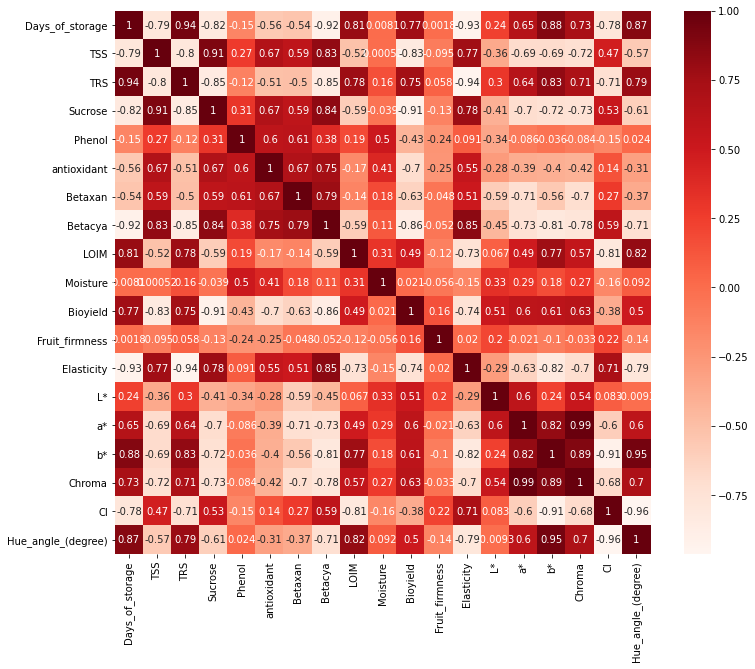

Correlation in graphical format for storage temperature of 8 C


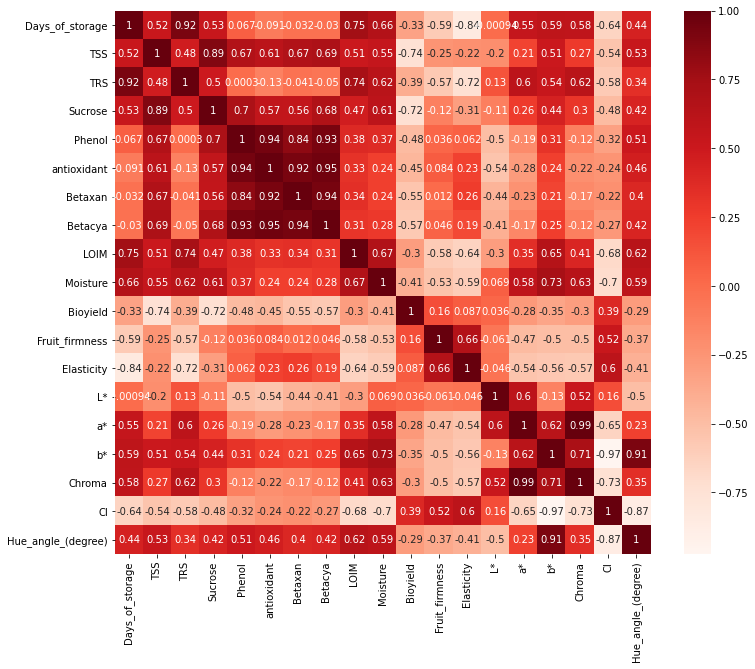

Correlation in graphical format for storage temperature for 30 and 8 together


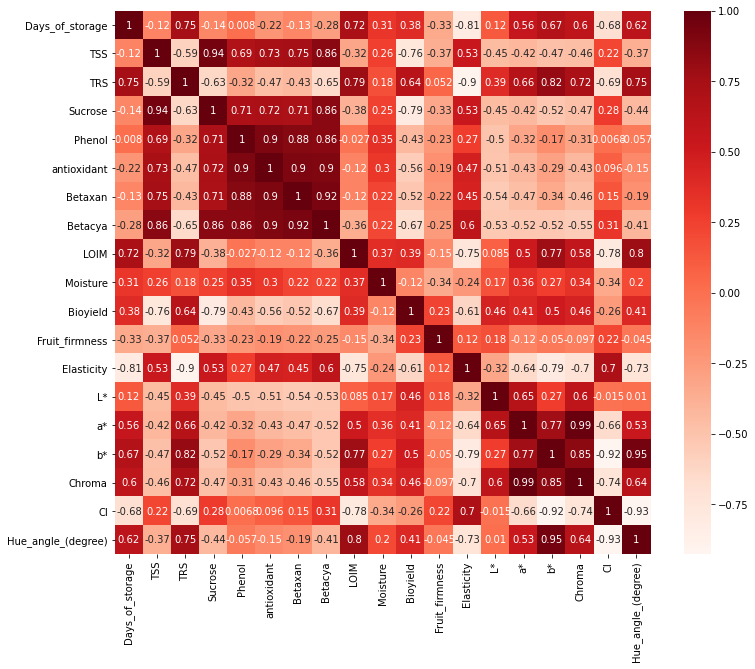

In [4]:
#@title
# Using pearson correlation
compare_value = 30
exception_columns = 'Temp_of_storage'
print("Correlation in graphical format for storage temperature of 30 C")
plt.figure(figsize=(12,10))
corr = data[data['Temp_of_storage'] == compare_value].loc[:, data.columns != exception_columns ].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

print("Correlation in graphical format for storage temperature of 8 C")
plt.figure(figsize=(12,10))
corr = data[data['Temp_of_storage'] != compare_value].loc[:, data.columns != exception_columns].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

print("Correlation in graphical format for storage temperature for 30 and 8 together")
plt.figure(figsize=(12,10))
corr = data.loc[:, data.columns != exception_columns].corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [5]:
#@title
#Pandas correlation
print("Correlation in tabular format\n")
#writer = pd.ExcelWriter('all.xlsx')
for i in ['pearson', 'kendall', 'spearman']:
  print("Method used now is " + i + "\n")
  #corr = data[data['Temp_of_storage'] == compare_value].loc[:, data.columns != exception_columns ].corr()
  corr = data.corr(method=i)
  lower_corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool)).iloc[:,:corr.shape[1]-1].round(2)
  print(tabulate(lower_corr.fillna('', inplace=False), headers='keys', tablefmt='psql') + "\n")
  #lower_corr.to_excel(writer, sheet_name=i)
#writer.save()
#files.download(filename='all.xlsx')

Correlation in tabular format

Method used now is pearson

+--------------------+-------------------+-------------------+-------+-------+-----------+----------+---------------+-----------+-----------+--------+------------+------------+------------------+--------------+-------+-------+-------+----------+-------+
|                    |   Days_of_storage | Temp_of_storage   | TSS   | TRS   | Sucrose   | Phenol   | antioxidant   | Betaxan   | Betacya   | LOIM   | Moisture   | Bioyield   | Fruit_firmness   | Elasticity   | L*    | a*    | b*    | Chroma   | CI    |
|--------------------+-------------------+-------------------+-------+-------+-----------+----------+---------------+-----------+-----------+--------+------------+------------+------------------+--------------+-------+-------+-------+----------+-------|
| Days_of_storage    |              1    |                   |       |       |           |          |               |           |           |        |            |            |   

In [18]:
#@title
# #Adding constant column of ones, mandatory for sm.OLS model
#X_1 = sm.add_constant(X)
#Fitting sm.OLS model
y = data.loc[:,"Sucrose"]
X = data.loc[:, ~data.columns.isin(['Days_of_storage', 'Temp_of_storage', 'Sucrose', 'category'])]
original_columns_names = X.columns
while True:
  X_1 = X[original_columns_names]
  X_1 = sm.add_constant(X_1)
  model = sm.OLS(y,X_1).fit()
  feature_value_above_threshold = model.pvalues[model.pvalues < 0.05]
  print(feature_value_above_threshold)
  columns_names = list(pd.DataFrame(feature_value_above_threshold[1:]).index)
  if len(columns_names) < len(original_columns_names):
    original_columns_names = columns_names
    continue
  else:
    break

print(len(original_columns_names))
print((original_columns_names))

TSS         3.232359e-07
Betaxan     2.945550e-02
Bioyield    2.765544e-02
b*          4.421685e-02
dtype: float64
const       2.410870e-11
Betaxan     4.649102e-05
Bioyield    1.094627e-06
dtype: float64
const       2.602514e-11
Betaxan     3.052334e-05
Bioyield    2.486183e-08
dtype: float64
2
['Betaxan', 'Bioyield']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
# Recursive Elimination Forward
model = LinearRegression()
y = data.loc[:,"Sucrose"]
X = data.loc[:, ~data.columns.isin(['Days_of_storage', 'Temp_of_storage', 'Sucrose', 'category'])]
# Transforming data into rfe, and before that initializing the rfe model
rfe = RFE(model, n_features_to_select= 4)
X_rfe = rfe.fit_transform(X, y)

#fit to the rfe model
model.fit(X_rfe, y)
print(X.columns)
print(rfe.support_)
print(rfe.ranking_)

#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(score_list)

Index(['TSS', 'TRS', 'Phenol', 'antioxidant', 'Betaxan', 'Betacya', 'LOIM', 'Moisture', 'Bioyield', 'Fruit_firmness', 'Elasticity', 'L*', 'a*', 'b*', 'Chroma', 'CI', 'Hue_angle_(degree)'], dtype='object')
[False False False False False False False False  True  True False False
  True False  True False False]
[ 6  3 14  8 12 13  9 10  1  1  4  5  1  2  1 11  7]
Optimum number of features: 10
Score with 10 features: 0.583991
[0.1941138948951262, 0.20025393883818232, 0.08542516271735257, 0.16552699008251348, 0.15291910102474882, 0.16864661351816512, 0.1919735297975006, 0.1656921403067495, 0.4836122297424162, 0.5839912062953145, 0.5492418522367821, 0.524503259157304]


ERROR! Session/line number was not unique in database. History logging moved to new session 59
Best alpha using built-in LassoCV: 2.272835
Best score using built-in LassoCV: 0.921784
Lasso picked 5 variables and eliminated the other 12 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

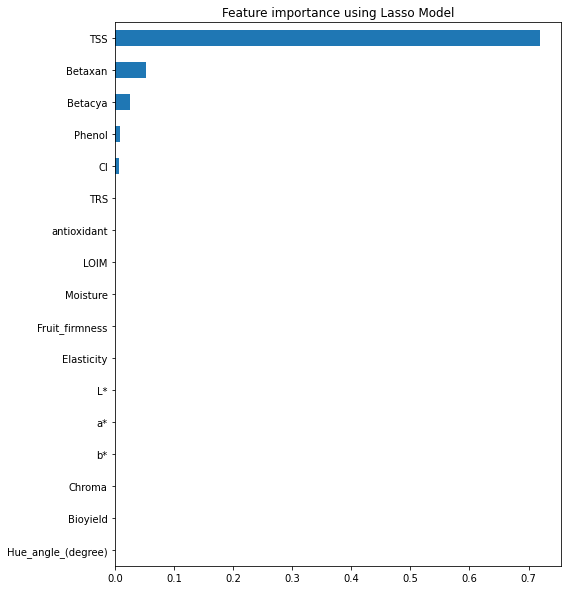

In [11]:
#Embedded Method
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = abs(coef.sort_values())
imp_coef = imp_coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [12]:
#split the train and test dataset with test datset size of 20% of the whole dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

# Build the multilieanear model
# Multi linear regression model
model = LassoCV()
mlm = model.fit(X_train, y_train)
mlm.score(X_test, y_test)

# Cross-validation on the training set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlm, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

(38, 17)
(10, 17)
[-1.11460326  0.56655882  0.79401509  0.80950041  0.46946918]
Accuracy: 0.30 (+/- 1.44)


In [13]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
print(X.columns)
print(model.feature_importances_*100)

Index(['TSS', 'TRS', 'Phenol', 'antioxidant', 'Betaxan', 'Betacya', 'LOIM', 'Moisture', 'Bioyield', 'Fruit_firmness', 'Elasticity', 'L*', 'a*', 'b*', 'Chroma', 'CI', 'Hue_angle_(degree)'], dtype='object')
[61.41674028  3.05743422  2.22621123  0.60600048  0.82269281 10.74478686
  1.17353104  1.44249009 11.17602908  0.6918299   0.67073094  1.45852535
  0.75602044  0.65631953  0.77062631  0.39840234  1.93162909]


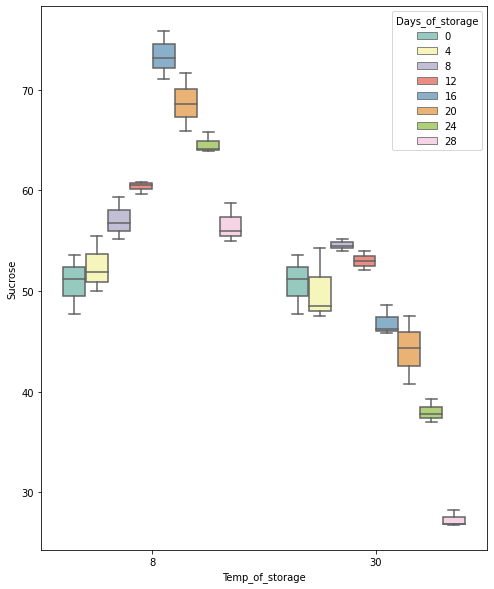

In [17]:
# load packages
import pandas as pd
import seaborn as sns
# load data file
#d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
#d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
#d_melt.columns = ['Genotype', 'years', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
#data.head()
sns.boxplot(x="Temp_of_storage", y="Sucrose", hue="Days_of_storage", data=data, palette="Set3") 

In [0]:
# load packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Ordinary Least Squares (OLS) model
# C(Genotype):C(years) represent interaction term
model = ols('TSS ~ C(Temp_of_storage) + C(Days_of_storage) + C(Temp_of_storage):C(Days_of_storage)', data=data.iloc[:,:3]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Temp_of_storage),2075.201502,1.0,216.750092,8.398376e-16
C(Days_of_storage),1080.447848,7.0,16.121475,7.169153e-09
C(Temp_of_storage):C(Days_of_storage),1488.524315,7.0,22.210427,1.336615e-10
Residual,306.373333,32.0,NaN,NaN


In [0]:
globals()["data_subset_" + "TSS"] = pd.DataFrame()
categories = [i for i in range(ord('a'), ord('q'))]
for i in categories:
  data_subset_TSS[chr(i)] = data[data['category'] == chr(i)]['TSS'].values

In [21]:
 import scipy.stats as stats
 f_value, p_value = stats.f_oneway(data_subset_TSS['a'], data_subset_TSS['b'], data_subset_TSS['c'], data_subset_TSS['d'], data_subset_TSS['e'], data_subset_TSS['f'], 
                                   data_subset_TSS['g'], data_subset_TSS['h'], data_subset_TSS['i'], data_subset_TSS['j'], data_subset_TSS['k'],
                                   data_subset_TSS['l'], data_subset_TSS['m'], data_subset_TSS['n'], data_subset_TSS['o'], data_subset_TSS['p'])
 print(f_value, p_value)

32.33822727536477 4.2931781459672646e-15


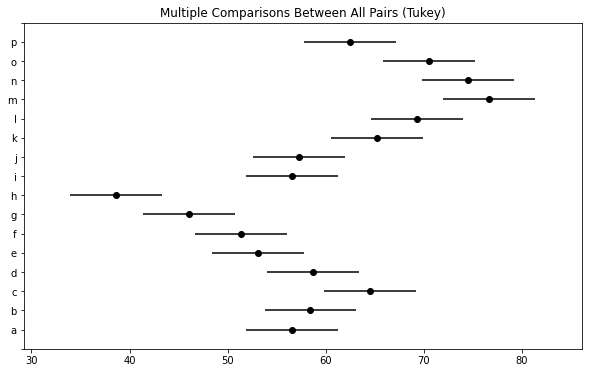

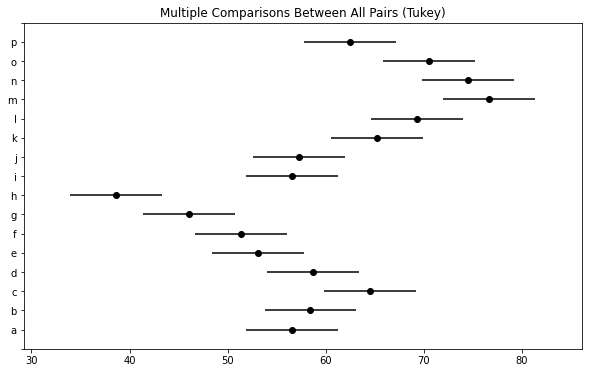

In [22]:
# Between the experiment
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=data['TSS'], groups=data['category'], alpha=0.05)
m_comp.plot_simultaneous()

In [32]:
# Implementing Boruta 
#!pip install Boruta
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
y = data.loc[:,"Sucrose"].values.ravel()
X = data.loc[:, ~data.columns.isin(['Days_of_storage', 'Temp_of_storage', 'Sucrose', 'category'])].values

#Regressor 
rf = RandomForestRegressor()
feat_selector = BorutaPy(rf, random_state=1, verbose=2, n_estimators='auto')
feat_selector.fit(X, y)
# check selected features - first 5 features are selected
print(feat_selector.support_)

# check ranking of features
print(data.loc[:, ~data.columns.isin(['Days_of_storage', 'Temp_of_storage', 'Sucrose', 'category'])].columns)
print(feat_selector.ranking_)

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	10
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	8
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	7
Rejected: 	3
Iterat